In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import keras
from keras.models import load_model
# from tensorflow.keras.models import load_model

In [3]:
tf.__version__

'2.16.1'

In [4]:
keras.__version__

'3.3.2'

In [2]:
import tensorflow as tf

# Define the input shape
input_shape = (122, 122, 3)

# Load the Keras model with the specified input shape
mod = keras.models.load_model("C:/Users/Charanteja/OneDrive/Pictures/Desktop/Inhouse_Internship/vgg_lung_cancer.h5", compile= False,custom_objects={'input_shape': input_shape})



In [6]:
mod.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 122, 122, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 122, 122, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 122, 122, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 61, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 61, 61, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 30, 30, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 30, 30, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 7, 7, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 1, 1, 512)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             

 Total params: 14,980,931 (57.15 MB)

 Trainable params: 265,219 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [7]:
from keras.preprocessing.image import img_to_array
def get_processed_img(img_path):
    
    img = cv2.imread(img_path)
    img = cv2.resize(img,(122,122))
#     img = img.reshape(122,122,3)
    img = img_to_array(img)
    img = np.array(img)/255.0
    
    # Add a batch dimension
    image = np.expand_dims(img, axis=0)
    
    return image

In [8]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    # print(img_tensor.shape)
    # Create a sub-model that outputs the feature maps and final prediction
    # print(model.output)
    print(model.inputs)
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Use GradientTape to record gradients
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        
        # If pred_index is not specified, use the predicted class index
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # Calculate gradients
    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Compute the heatmap
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalise the heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()



In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

def display_gradcam(img, heatmap, alpha=0.3):
    # Rescale heatmap to a range of 0-255
    heatmap = np.uint8(255 * heatmap)
    
    # Use the "jet" colormap to colourize the heatmap
    jet = cm.get_cmap("hsv")
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]
    
    # Transform the heatmap into an image.
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    
    # Resize the heatmap to match the image dimensions
    jet_heatmap = jet_heatmap.resize((img.shape[2], img.shape[1]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)
    
    # Superimpose the heatmap on the original image
    superimposed_img = jet_heatmap * alpha + img
    plt.imshow(superimposed_img[0])

In [10]:
img_arr = get_processed_img("D:/lc25000/LC25000/lung_split/test/lung_aca/lungaca156.jpeg")
print(img_arr.shape)
a = np.argmax(mod.predict(img_arr)[0])
a

(1, 122, 122, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 620ms/step


2

In [11]:
# img_arr = get_processed_img("D:/lc25000/LC25000/lung_split/test/lung_aca/lungaca156.jpeg")

# heatmap = make_gradcam_heatmap(img_arr, mod, 'block5_conv3')

# plt.axis('off')
# plt.matshow(heatmap)
# plt.show()

In [12]:
# display_gradcam(get_processed_img("D:/lc25000/LC25000/lung_split/test/lung_aca/lungaca336.jpeg"), heatmap)

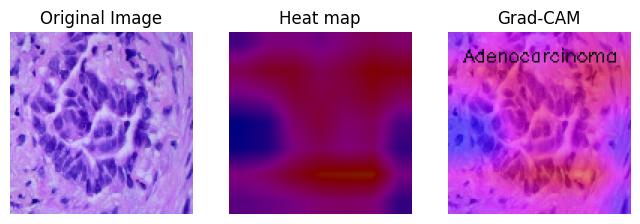

In [13]:
from keras.layers import Input, AveragePooling2D, Flatten, Dense, Dropout, BatchNormalization


# Combine base model and classification layers
# model = Model(inputs=base_model.input, outputs=predictions)

def get_gradcam(model, img_tensor, target_class_idx, last_conv_layer_name='block5_conv3'):
    # Define gradient model
    grad_model = keras.models.Model(inputs=model.input, outputs=[model.get_layer(last_conv_layer_name).output, model.output])
    
    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_tensor)
        loss = predictions[:, target_class_idx]
    grads = tape.gradient(loss, conv_outputs)
    # print(conv_outputs.shape)
    # Compute guided gradients
    guided_grads = tf.cast(conv_outputs > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads
    
    # Get convolution outputs and guided gradients
    conv_outputs = conv_outputs[0]
    # print(conv_outputs.shape)
    guided_grads = guided_grads[0]
    
    # Compute weights
    weights = tf.reduce_mean(guided_grads, axis=(0, 1))
    
    # Compute CAM
    cam = tf.reduce_sum(tf.multiply(weights, conv_outputs), axis=-1)
    cam = np.maximum(cam, 0)
    cam /= np.max(cam)
    
    return cam

def visualize_gradcam(model, img_path, target_class_idx, alpha = 0.4,last_conv_layer_name='block5_conv3', img_size=(122, 122)):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Generate Grad-CAM heatmap
    heatmap = get_gradcam(model, img_array, target_class_idx, last_conv_layer_name)
    # cov_out = np.array(cov_out)
    # Resize heatmap to the size of the input image
    heatmap = cv2.resize(heatmap, (img_array.shape[2], img_array.shape[1]))
    heatmap = np.uint8(255 * heatmap)
    # cov_out = cv2.resize(cov_out, (img_array.shape[2], img_array.shape[1]))
    # cov_out = cov_out.reshape((122,122,3))
    # cov_out = np.uint8(255 * cov_out)
    
    # Apply colormap
    colormap = cv2.applyColorMap(heatmap, cv2.COLORMAP_HSV)
    
    # Convert colormap to the same data type as img_array[0]
    colormap = colormap.astype(np.float32) / 255.0
    c1 = colormap * 0.5
    # Superimpose heatmap on the original image
    superimposed_img = cv2.addWeighted(img_array[0], 0.5, colormap, 0.5, 0)
    class_lst = ['Healthy_tissue','Adenocarcinoma','Squamous_cell']
    cv2.putText(superimposed_img,class_lst[target_class_idx],org = (10,20),fontFace = cv2.FONT_ITALIC,
                fontScale = 0.4, color = (0, 0, 0),thickness = 1,lineType = cv2.LINE_AA, bottomLeftOrigin=False)
    # Display images
    fig, ax = plt.subplots(1, 3, figsize=(8, 8))
    ax[0].imshow(img)
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(c1)
    ax[1].set_title('Heat map')
    ax[1].axis('off')
    ax[2].imshow(superimposed_img)
    ax[2].set_title('Grad-CAM')
    ax[2].axis('off')
    plt.savefig('gradcam_result_aca.png')
    plt.show()
    

# Example usage
img_path = "D:/lc25000/LC25000/lung_split/test/lung_aca/lungaca333.jpeg"
target_class_idx = 1   # Index of the target class
visualize_gradcam(mod, img_path, target_class_idx)